# House Price Prediction

In [1]:
import numpy as np
import pandas as pd

train_df = pd.read_csv('data\\train.csv')
test_df = pd.read_csv('data\\test.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data exploration

In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are __38__ numeric features and __43__ non-numeric categorical features

In [3]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
train_df.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


### Data preprocessing

#### Numeric features

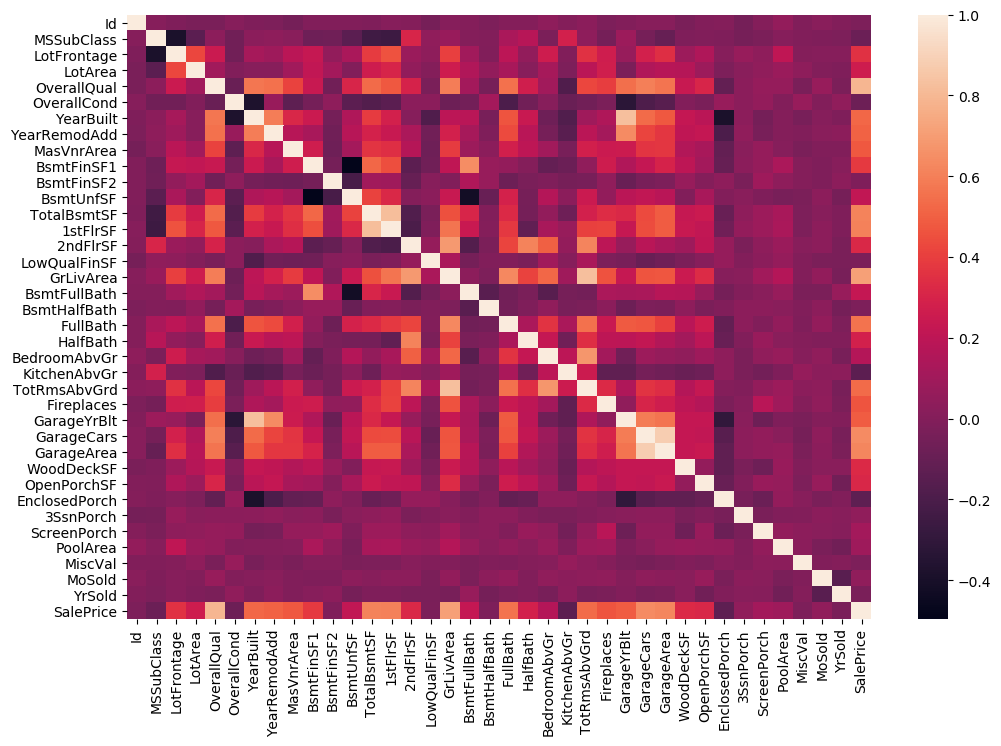

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8), dpi = 100)
corr_df = train_df.corr()
sns.heatmap(corr_df)

Now we will iteratively determine which numerical features to drop based on correlation. Two features are strongly correlated if their coefficient is greater than 0.7 and the one having the weaker correlation with price is dropped.

In [6]:
def drop_features(df):
    corr_df = df.corr()
    features = corr_df.drop('SalePrice', axis=1).columns
    l = len(features)
    to_drop = []
    for i in range(l):
        for j in range(i+1,l):
            corr = df[features[i]].corr(df[features[j]])
            if abs(corr) > 0.7:   
                a = df[features[i]].corr(df['SalePrice'])
                b = df[features[j]].corr(df['SalePrice'])
                if abs(a)>abs(b):
                    to_drop.append(features[j])
                else:
                    to_drop.append(features[i])
    to_drop.append('Id')  # id is also dropped because it is irrelevant for training
    print('features dropped: ',to_drop)
    return to_drop, df.drop(to_drop,axis=1)

In [7]:
to_drop, train_df_1 = drop_features(train_df)
train_df_1.head()

features dropped:  ['GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd', 'GarageArea', 'Id']


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Now, we'll one-hot encode the non-numeric categorical features

In [8]:
def one_hot_encode_object(df):
    object_columns = df.select_dtypes(include='object').columns.values
    return pd.get_dummies(df,columns=object_columns)

train_df_2 = one_hot_encode_object(train_df_1)
train_df_2.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0


#### Removing outliers in Sale Price
First, lets check for outliers

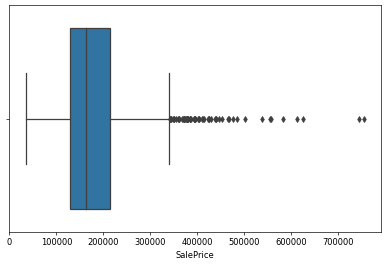

In [9]:
plt.figure(figsize=(8,5), dpi=60)
sns.boxplot(train_df['SalePrice'])

Box plot shows obvious outliers in price, let's remove them

In [10]:
# price outlier removal
def outlier_removal(df):
    col = 'SalePrice'
    q3 = df[col].quantile(0.75)
    q1 = df[col].quantile(0.25)
    price_ub = q3 + 1.5*(q3-q1)      # upper bound
    price_lb = q1 - 1.5*(q3-q1)     # lower bound
    df_new = df[df[col] < price_ub]
    print('removed outliers: ',df.shape[0]-df_new.shape[0])
    return df_new

train_df_3 = outlier_removal(train_df_2)

removed outliers:  61


#### Null removal

In [11]:
train_df_4 = train_df_3.fillna(0)
train_df_4.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 285, dtype: int64

### Modelling

In [12]:
from sklearn.model_selection import train_test_split

X = train_df_4.drop('SalePrice',axis=1).values
y = train_df_4['SalePrice'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression 
#from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

lr = LinearRegression()
rfreg = RandomForestRegressor()
xgr = XGBRegressor()
scaler = MinMaxScaler()

regressors = {'rfreg':rfreg,'XGR':xgr}#,'SGDR':sgdr,'RandomForest':rfreg}
for name in regressors:
    regressor = regressors[name]
    pipeline = Pipeline(steps=[('scaler',scaler),('name',regressor)])
    model = pipeline.fit(X_train,y_train)
    score = model.score(X_val,y_val)
    predict = model.predict(X_val)
    rmse = mean_squared_error(np.log(y_val),np.log(predict),squared=False)
    print(name+': score - %1.3f, rmse - %1.4f'%(score,rmse))

rfreg: score - 0.863, rmse - 0.1259
XGR: score - 0.876, rmse - 0.1200


Text(0, 0.5, 'Predicted price')

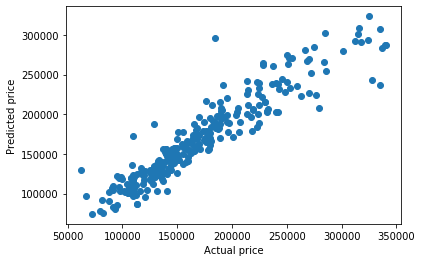

In [14]:
plt.plot(y_val,predict,'o')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')

## Making predictions on the test dataset

In [15]:
test_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [16]:
print('test object categories: ',test_df.describe(include='object').loc['unique'].sum())
print('train object categories: ',train_df.describe(include='object').loc['unique'].sum())

test object categories:  234
train object categories:  252


We see that there are 18 more categorical features in the train data than in the test data. We need to fix this!

In [17]:
# lets preprocess the test dataset first
test_df_processed = one_hot_encode_object(test_df.drop(to_drop,axis=1))
test_df_processed = test_df_processed.fillna(0)
test_df_processed.shape

(1459, 266)

Now we insert the missing columns consisting of zeros in the appropriate location

In [18]:
train_df_5 = train_df_4.drop('SalePrice',axis=1)
for column in train_df_5.columns:
    if column not in test_df_processed.columns:
        loc = int(np.where(train_df_5.columns==column)[0][0])
        test_df_processed.insert(loc,column,value=np.zeros(test_df_processed.shape[0]))

print('training data shape: ',train_df_5.shape[1])
print('test data shape: ',test_df_processed.shape[1])

training data shape:  284
test data shape:  284


Let's make sure that the columns are inserted in the right locations

In [19]:
sum(test_df_processed.columns == train_df_5.columns)

284

Let's now make our predictions

In [21]:
X_test = test_df_processed.values
predicted_prices = model.predict(X_test)

In [22]:
submit = pd.DataFrame(zip(test_df.Id.values,predicted_prices.astype(int)),columns=['Id','Sale_Price'])
submit.head()

,Id,Sale_Price
0,1461,121581
1,1462,170075
2,1463,197248
3,1464,196568
4,1465,193619


##  DNN Model
Lets try a DNN model to see if prediction could be improved

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam

dnn_model = Sequential()
dnn_model.add(Dense(100, input_shape = (X_train.shape[1],), activation = 'relu'))
dnn_model.add(Dense(50, activation='relu'))
dnn_model.add(Dropout(0.4))
dnn_model.add(Dense(1, activation='linear'))
dnn_model.compile(loss='mean_squared_logarithmic_error',optimizer=Adam(learning_rate=0.01))

In [44]:
dnn_model.fit(X_train,y_train, 
          batch_size=10, 
          validation_data= (X_val, y_val),
          epochs=100, verbose=1)

Epoch 1/100
112/112 [==============================] - 0s 4ms/step - loss: 1.9656 - val_loss: 0.0900
Epoch 2/100
112/112 [==============================] - 0s 3ms/step - loss: 0.1372 - val_loss: 0.0705
Epoch 3/100
112/112 [==============================] - 0s 4ms/step - loss: 0.1039 - val_loss: 0.0536
Epoch 4/100
112/112 [==============================] - 1s 5ms/step - loss: 0.0956 - val_loss: 0.0520
Epoch 5/100
112/112 [==============================] - 1s 6ms/step - loss: 0.0910 - val_loss: 0.0472
Epoch 6/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0838 - val_loss: 0.0446
Epoch 7/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0832 - val_loss: 0.0447
Epoch 8/100
112/112 [==============================] - 0s 4ms/step - loss: 0.0833 - val_loss: 0.0426
Epoch 9/100
112/112 [==============================] - 1s 6ms/step - loss: 0.0881 - val_loss: 0.0424
Epoch 10/100
112/112 [==============================] - 1s 7ms/step - loss: 0.0783 - val_lo

In [45]:
predict_2 = dnn_model.predict(X_test)
submit['Dnn_prediction'] = predict_2.astype(int)
submit.head(100)

,Id,Sale_Price,Dnn_prediction
0,1461,121581,121649
1,1462,170075,170031
2,1463,197248,206970
3,1464,196568,215322
4,1465,193619,190957
...,...,...,...
95,1556,90200,112286
96,1557,101198,120945
97,1558,75302,110009
98,1559,73337,130002


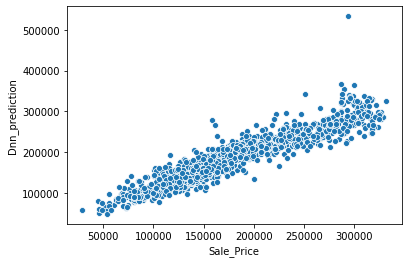

In [46]:
sns.scatterplot(x='Sale_Price', y='Dnn_prediction', data=submit)

In [47]:
submit['Sale_Price'].corr(submit['Dnn_prediction'])

0.935279573831015

The DNN and XGBoost regression results __strongly correlate!__